In [3]:

import requests
parameters = {
    'q': 'Apple',
    'domains': 'marketwatch.com,cnbc.com,wsj.com,forbes.com',
    'sortBy': 'publishedAt',
    'apiKey': '1b20fb6f9b9d40f0b4e4ad6fe5d90755'  # Assurez-vous d'utiliser votre propre clé API
}

url = 'https://newsapi.org/v2/everything'

# Appel de l'API
response = requests.get(url, params=parameters)
articles = response.json().get('articles', [])  # Utilisez .get pour éviter les erreurs si 'articles' n'existe pas

# Itérer sur chaque article récupéré
for article in articles:
    title = article.get('title', 'Titre indisponible')  # Utilisez .get pour éviter les erreurs si 'title' n'existe pas
    source_name = article.get('source', {}).get('name', 'Source indisponible')  # Récupérer le nom de la source
    url = article.get('url', 'URL indisponible')  # Récupérer l'URL de l'article
    print(f"Titre: {title}\nSource: {source_name}\nURL: {url}\n")


/Users/dabadieraphael/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Titre: iPhone 16 And iPhone 16 Pro To Upgrade Important Apple Specialty, Insider Claims
Source: Forbes
URL: https://www.forbes.com/sites/davidphelan/2023/12/10/apple-iphone-16-to-upgrade-essential-apple-specialty-insider-claims/

Titre: New Samsung Leaks Reveal Stunning Galaxy S24 Ultra Design Decision
Source: Forbes
URL: https://www.forbes.com/sites/ewanspence/2023/12/10/samsung-galaxy-s24-ultra-design-performance-s-pen-speaker-volume-new-galaxy-s24-release/

Titre: Apple Leak Confirms Surprise iPhone 16 Pro Upgrade
Source: Forbes
URL: https://www.forbes.com/sites/ewanspence/2023/12/10/apple-iphone-16-pro-max-battery-upgrade-performance-impact-new-iphone-release/

Titre: Forget The New MacBook Pro, Apple Has Something Much Better
Source: Forbes
URL: https://www.forbes.com/sites/ewanspence/2023/12/10/apple-macbook-pro-m3-performance-battery-upgrade-impact-new-macbook-air-release/

Titre: Apple's Competency At Its Core
Source: Forbes
URL: https://www.forbes.com/sites/gregpetro/2023/12/1

In [4]:
import csv

with open('articles.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Titre', 'URL', 'Date de publication', 'Description','Source'])
    for article in articles:
        if "Apple" not in article['title']:
          continue
        writer.writerow([article['title'], article['url'], article['publishedAt'], article['description'], article['source']['name']])

       



# Récupération du contenu des articles

In [5]:
import pandas as pd

df=pd.read_csv('articles.csv')
df

,Titre,URL,Date de publication,Description,Source
0,iPhone 16 And iPhone 16 Pro To Upgrade Importa...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-11T00:00:01Z,Next year’s iPhones will have an improved hard...,Forbes
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10T21:42:30Z,iPhone 16 Pro models will be the first to bene...,Forbes
2,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10T19:17:56Z,Apple’s awkward MacBook Pro may look attractiv...,Forbes
3,Apple's Competency At Its Core,https://www.forbes.com/sites/gregpetro/2023/12...,2023-12-10T18:37:42Z,Examining Apple's triumph in innovation and ma...,Forbes
4,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09T20:30:22Z,Apple’s awkward MacBook Pro may look attractiv...,Forbes
5,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09T14:42:17Z,iPhone 16 Pro models will be the first to bene...,Forbes
6,Apple iOS 17.2 Release Date: The Coolest iPhon...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-09T14:38:43Z,There’s a big iPhone update coming and it’s fu...,Forbes
7,Apple iMessage Soundly Beaten As Surprise New ...,https://www.forbes.com/sites/zakdoffman/2023/1...,2023-12-09T12:30:29Z,Forget iPhone 15—Apple suddenly has a major iP...,Forbes
8,"Apple Loop: Apple’s iPhone 16 Problem, Stunnin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-08T21:32:17Z,This week’s Apple headlines; Apple’s iPhone 16...,Forbes
9,"Apple iPhone, Watch product design head to lea...",https://www.marketwatch.com/story/apple-iphone...,2023-12-08T20:37:19Z,"Tang Tan, the Apple Inc. executive who headed ...",MarketWatch


In [6]:
urls = [url for url in df['URL']]
html_contents = []
compteur=0
df['Contenu']=[None] * len(df)

for url in urls:
    response = requests.get(url)
    if response.status_code == 200:
        html_contents.append(response.text)
        df['Contenu'].loc[compteur]=response.text
    else:
        print(f"Échec de récupération pour {url}")
    compteur+=1

df.head()

,Titre,URL,Date de publication,Description,Source,Contenu
0,iPhone 16 And iPhone 16 Pro To Upgrade Importa...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-11T00:00:01Z,Next year’s iPhones will have an improved hard...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10T21:42:30Z,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
2,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10T19:17:56Z,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
3,Apple's Competency At Its Core,https://www.forbes.com/sites/gregpetro/2023/12...,2023-12-10T18:37:42Z,Examining Apple's triumph in innovation and ma...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
4,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09T20:30:22Z,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."


In [7]:
#Transformation de la colonne Date de publication en DateTime

df['Date de publication']=pd.to_datetime(df['Date de publication'])
df.head()

,Titre,URL,Date de publication,Description,Source,Contenu
0,iPhone 16 And iPhone 16 Pro To Upgrade Importa...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-11 00:00:01+00:00,Next year’s iPhones will have an improved hard...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10 21:42:30+00:00,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
2,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10 19:17:56+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
3,Apple's Competency At Its Core,https://www.forbes.com/sites/gregpetro/2023/12...,2023-12-10 18:37:42+00:00,Examining Apple's triumph in innovation and ma...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."
4,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 20:30:22+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel..."


Comparaison de la taille des différents titres / descriptions / contenus

In [8]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


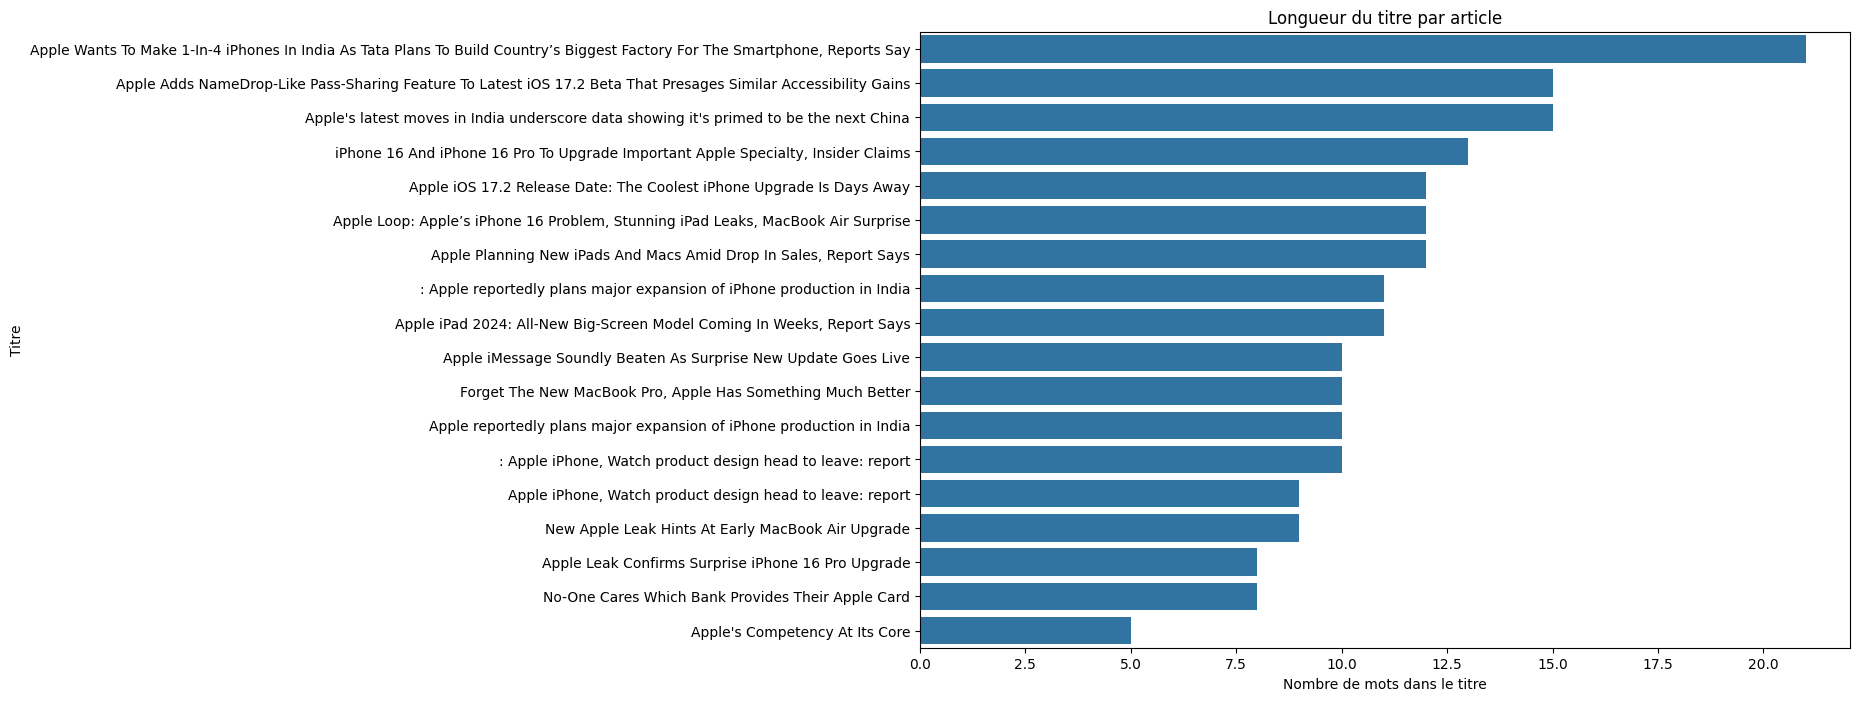

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Title_length']=df['Titre'].apply(lambda x : len(str(x).split()))
df_sorted_by_title=df.sort_values(by='Title_length', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Title_length', y='Titre', data=df_sorted_by_title, orient='h')

plt.xlabel('Nombre de mots dans le titre')
plt.ylabel('Titre')
plt.title('Longueur du titre par article')
plt.show()

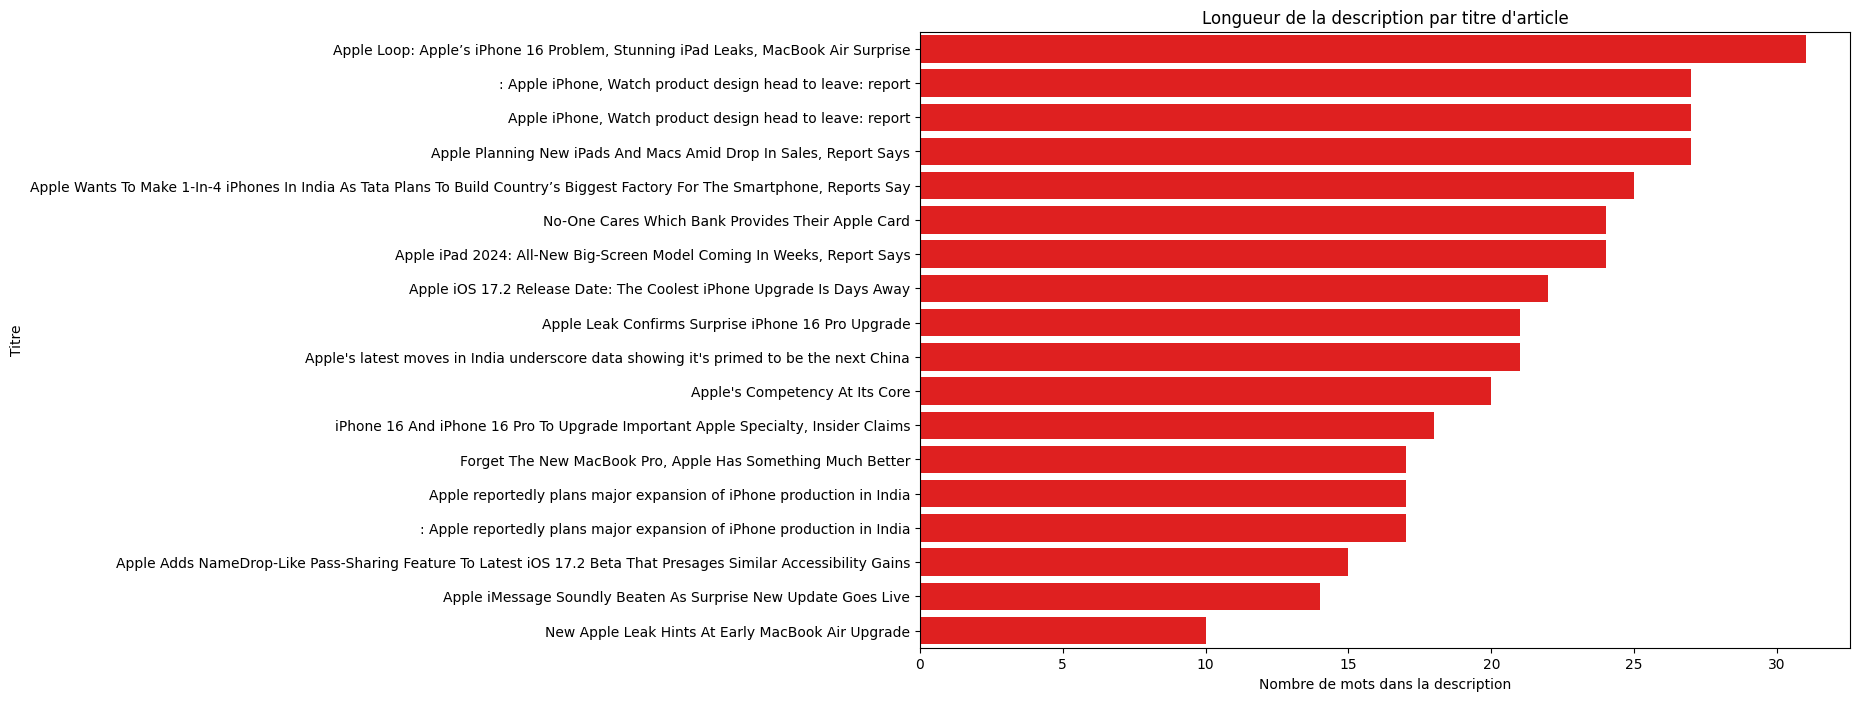

In [10]:
df['Description_length']=df['Description'].apply(lambda x : len(str(x).split()))
df_sorted_by_title=df.sort_values(by='Description_length', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Description_length', y='Titre', data=df_sorted_by_title, orient='h', color='red')

plt.xlabel('Nombre de mots dans la description')
plt.ylabel('Titre')
plt.title('Longueur de la description par titre d\'article')
plt.show()

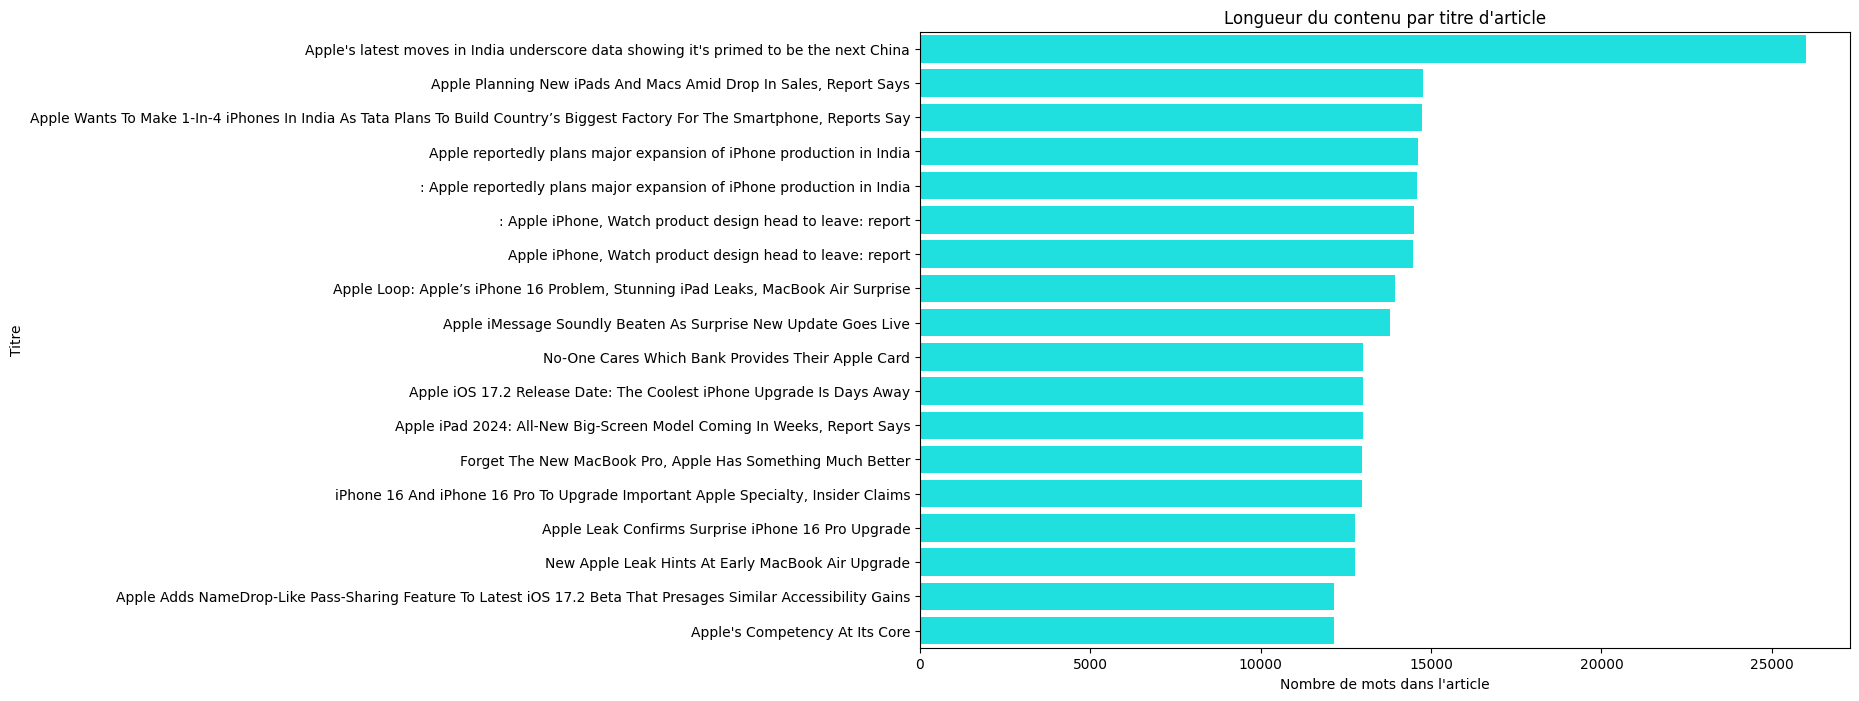

In [11]:
df['Content_length']=df['Contenu'].apply(lambda x : len(str(x).split()))
df_sorted_by_title=df.sort_values(by='Content_length', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Content_length', y='Titre', data=df_sorted_by_title, orient='h', color='cyan')

plt.xlabel("Nombre de mots dans l'article")
plt.ylabel('Titre')
plt.title('Longueur du contenu par titre d\'article')
plt.show()

In [12]:
df_sorted_by_title

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length
11,Apple's latest moves in India underscore data ...,https://www.cnbc.com/2023/12/08/apples-latest-...,2023-12-08 18:20:47+00:00,India's economy is about 16½ years behind Chin...,CNBC,"<!DOCTYPE html><html lang=""en"" prefix=""og=http...",15,21,25990
19,Apple Planning New iPads And Macs Amid Drop In...,https://www.forbes.com/sites/britneynguyen/202...,2023-12-06 19:57:35+00:00,"Apple did not release new iPads this year, con...",Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,27,14765
13,Apple Wants To Make 1-In-4 iPhones In India As...,https://www.forbes.com/sites/siladityaray/2023...,2023-12-08 11:48:48+00:00,Apple wants to expand its Indian manufacturing...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",21,25,14747
14,Apple reportedly plans major expansion of iPho...,https://www.marketwatch.com/story/apple-report...,2023-12-08 04:23:00+00:00,Apple Inc. is planning a massive expansion of ...,MarketWatch,"<!DOCTYPE html>\n<html\n lang=""en-US""\n data...",10,17,14625
15,: Apple reportedly plans major expansion of iP...,https://www.marketwatch.com/story/apple-report...,2023-12-08 04:23:00+00:00,Apple Inc. is planning a massive expansion of ...,MarketWatch,"<!DOCTYPE html>\n<html\n lang=""en-US""\n data...",11,17,14597
10,": Apple iPhone, Watch product design head to l...",https://www.marketwatch.com/story/apple-iphone...,2023-12-08 20:30:00+00:00,"Tang Tan, the Apple Inc. executive who headed ...",MarketWatch,"<!DOCTYPE html>\n<html\n lang=""en-US""\n data...",10,27,14485
9,"Apple iPhone, Watch product design head to lea...",https://www.marketwatch.com/story/apple-iphone...,2023-12-08 20:37:19+00:00,"Tang Tan, the Apple Inc. executive who headed ...",MarketWatch,"<!DOCTYPE html>\n<html\n lang=""en-US""\n data...",9,27,14456
8,"Apple Loop: Apple’s iPhone 16 Problem, Stunnin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-08 21:32:17+00:00,This week’s Apple headlines; Apple’s iPhone 16...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,31,13927
7,Apple iMessage Soundly Beaten As Surprise New ...,https://www.forbes.com/sites/zakdoffman/2023/1...,2023-12-09 12:30:29+00:00,Forget iPhone 15—Apple suddenly has a major iP...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,14,13800
12,No-One Cares Which Bank Provides Their Apple Card,https://www.forbes.com/sites/davidbirch/2023/1...,2023-12-08 11:57:45+00:00,So long as my rewards card works and I get my ...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",8,24,13004


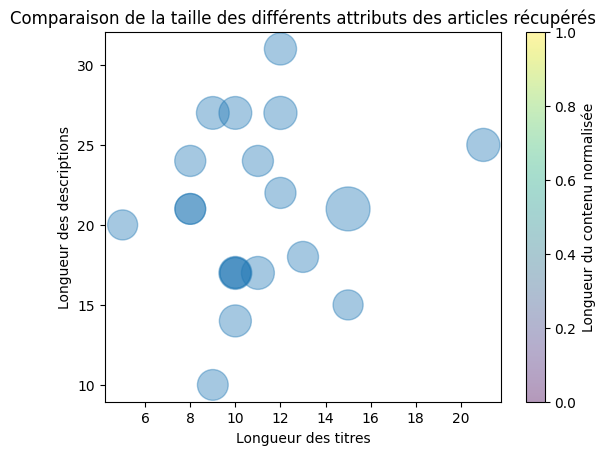

In [13]:
#Comparaison des articles récoltés entre eux selon ces trois dimensions sous forme d'un bubble chart : l'axe X correspond à la longueur du titre, l'axe Y à la longueur de la description et la taille de la bulle représentera la longueur du contenu de l'article.

import matplotlib.pyplot as plt

bubble_size=df['Content_length']/df['Content_length'].max()*1000 #Normalisation de la taille des bulles à des valeurs proches de celles obtenues pour les tailles de titre et de description

plt.scatter(x=df['Title_length'], y=df['Description_length'],s=bubble_size,alpha=0.4)
plt.xlabel('Longueur des titres')
plt.ylabel('Longueur des descriptions')
plt.title('Comparaison de la taille des différents attributs des articles récupérés')
plt.colorbar(label='Longueur du contenu normalisée')
plt.show()

# Préparation du texte en vue de l'analyse de sentiments (Nettoyage et analyse des titres et descriptions)

**Nettoyage du texte**

In [42]:
#Fonctions importantes pour la suite 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def cleaning_text(text):
    #Passage du texte en miniscules
    text=text.lower()
    #Suppression des chiffres
    text=re.sub(r'\d+', '', text)
    #Suppression de la ponctuation et des symboles spéciaux
    text=re.sub(r'[^\w\s]', '', text)
    return text


def count_common_words(text):
    words=text.split()
    dict={}
    for el in words :
        if el not in dict:
            dict[el]=1
        else:
            dict[el]+=1
    return dict

def most_common_words(dictionary):
    sorted_dict=dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))
    return sorted_dict



def combine_dictionaries(df,df_column_name):
    combined_dict={}
    column_index=df.columns.get_loc(str(df_column_name))
    for i in range(len(df)):
        temp_dictionary=df.iloc[i,int(column_index)]

        for key, value in temp_dictionary.items():
            if key not in combined_dict:
                combined_dict[key]=value
            else:
                combined_dict[key]+=value
    return combined_dict

stops = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_stopwords(text):
    words = word_tokenize(text)
    cleaned_text=[word for word in words if word not in stops]
    return ' '.join(cleaned_text)

In [15]:
pip install beautifulsoup4 lxml

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
import re

In [43]:
df_analyse_1=df.copy()
df_analyse_1['Titre_cleaned']=df_analyse_1['Titre'].apply(cleaning_text)
df_analyse_1['Description_cleaned']=df_analyse_1['Description'].apply(cleaning_text)
df_analyse_1.head()

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length,Titre_cleaned,Description_cleaned
0,iPhone 16 And iPhone 16 Pro To Upgrade Importa...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-11 00:00:01+00:00,Next year’s iPhones will have an improved hard...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",13,18,12963,iphone and iphone pro to upgrade important a...,next years iphones will have an improved hardw...
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10 21:42:30+00:00,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",8,21,12760,apple leak confirms surprise iphone pro upgrade,iphone pro models will be the first to benefi...
2,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10 19:17:56+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12981,forget the new macbook pro apple has something...,apples awkward macbook pro may look attractive...
3,Apple's Competency At Its Core,https://www.forbes.com/sites/gregpetro/2023/12...,2023-12-10 18:37:42+00:00,Examining Apple's triumph in innovation and ma...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",5,20,12147,apples competency at its core,examining apples triumph in innovation and mar...
4,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 20:30:22+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12981,forget the new macbook pro apple has something...,apples awkward macbook pro may look attractive...


In [44]:
df_analyse_1['Counting_Words_Text']=df_analyse_1['Titre_cleaned'].apply(count_common_words)
df_analyse_1['Counting_Words_Description']=df_analyse_1['Description_cleaned'].apply(count_common_words)

df_analyse_1

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length,Titre_cleaned,Description_cleaned,Counting_Words_Text,Counting_Words_Description
0,iPhone 16 And iPhone 16 Pro To Upgrade Importa...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-11 00:00:01+00:00,Next year’s iPhones will have an improved hard...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",13,18,12963,iphone and iphone pro to upgrade important a...,next years iphones will have an improved hardw...,"{'iphone': 2, 'and': 1, 'pro': 1, 'to': 1, 'up...","{'next': 1, 'years': 1, 'iphones': 1, 'will': ..."
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10 21:42:30+00:00,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",8,21,12760,apple leak confirms surprise iphone pro upgrade,iphone pro models will be the first to benefi...,"{'apple': 1, 'leak': 1, 'confirms': 1, 'surpri...","{'iphone': 2, 'pro': 1, 'models': 1, 'will': 1..."
2,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10 19:17:56+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12981,forget the new macbook pro apple has something...,apples awkward macbook pro may look attractive...,"{'forget': 1, 'the': 1, 'new': 1, 'macbook': 1...","{'apples': 1, 'awkward': 1, 'macbook': 1, 'pro..."
3,Apple's Competency At Its Core,https://www.forbes.com/sites/gregpetro/2023/12...,2023-12-10 18:37:42+00:00,Examining Apple's triumph in innovation and ma...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",5,20,12147,apples competency at its core,examining apples triumph in innovation and mar...,"{'apples': 1, 'competency': 1, 'at': 1, 'its':...","{'examining': 1, 'apples': 1, 'triumph': 1, 'i..."
4,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 20:30:22+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12981,forget the new macbook pro apple has something...,apples awkward macbook pro may look attractive...,"{'forget': 1, 'the': 1, 'new': 1, 'macbook': 1...","{'apples': 1, 'awkward': 1, 'macbook': 1, 'pro..."
5,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 14:42:17+00:00,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",8,21,12760,apple leak confirms surprise iphone pro upgrade,iphone pro models will be the first to benefi...,"{'apple': 1, 'leak': 1, 'confirms': 1, 'surpri...","{'iphone': 2, 'pro': 1, 'models': 1, 'will': 1..."
6,Apple iOS 17.2 Release Date: The Coolest iPhon...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-09 14:38:43+00:00,There’s a big iPhone update coming and it’s fu...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,22,13002,apple ios release date the coolest iphone upg...,theres a big iphone update coming and its full...,"{'apple': 1, 'ios': 1, 'release': 1, 'date': 1...","{'theres': 1, 'a': 1, 'big': 1, 'iphone': 1, '..."
7,Apple iMessage Soundly Beaten As Surprise New ...,https://www.forbes.com/sites/zakdoffman/2023/1...,2023-12-09 12:30:29+00:00,Forget iPhone 15—Apple suddenly has a major iP...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,14,13800,apple imessage soundly beaten as surprise new ...,forget iphone apple suddenly has a major iphon...,"{'apple': 1, 'imessage': 1, 'soundly': 1, 'bea...","{'forget': 1, 'iphone': 2, 'apple': 1, 'sudden..."
8,"Apple Loop: Apple’s iPhone 16 Problem, Stunnin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-08 21:32:17+00:00,This week’s Apple headlines; Apple’s iPhone 16...,Forbes,"<!DOCTYPE html><html lang=""en"">

In [45]:
#On affiche les mots les plus fréquents dans chaque article

df_analyse_1['Most_common_text']=df_analyse_1['Counting_Words_Text'].apply(most_common_words)
df_analyse_1['Most_common_description']=df_analyse_1['Counting_Words_Description'].apply(most_common_words)
df_analyse_1.head()

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length,Titre_cleaned,Description_cleaned,Counting_Words_Text,Counting_Words_Description,Most_common_text,Most_common_description
0,iPhone 16 And iPhone 16 Pro To Upgrade Importa...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-11 00:00:01+00:00,Next year’s iPhones will have an improved hard...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",13,18,12963,iphone and iphone pro to upgrade important a...,next years iphones will have an improved hardw...,"{'iphone': 2, 'and': 1, 'pro': 1, 'to': 1, 'up...","{'next': 1, 'years': 1, 'iphones': 1, 'will': ...","{'iphone': 2, 'and': 1, 'pro': 1, 'to': 1, 'up...","{'next': 1, 'years': 1, 'iphones': 1, 'will': ..."
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10 21:42:30+00:00,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",8,21,12760,apple leak confirms surprise iphone pro upgrade,iphone pro models will be the first to benefi...,"{'apple': 1, 'leak': 1, 'confirms': 1, 'surpri...","{'iphone': 2, 'pro': 1, 'models': 1, 'will': 1...","{'apple': 1, 'leak': 1, 'confirms': 1, 'surpri...","{'iphone': 2, 'to': 2, 'pro': 1, 'models': 1, ..."
2,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10 19:17:56+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12981,forget the new macbook pro apple has something...,apples awkward macbook pro may look attractive...,"{'forget': 1, 'the': 1, 'new': 1, 'macbook': 1...","{'apples': 1, 'awkward': 1, 'macbook': 1, 'pro...","{'forget': 1, 'the': 1, 'new': 1, 'macbook': 1...","{'apples': 1, 'awkward': 1, 'macbook': 1, 'pro..."
3,Apple's Competency At Its Core,https://www.forbes.com/sites/gregpetro/2023/12...,2023-12-10 18:37:42+00:00,Examining Apple's triumph in innovation and ma...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",5,20,12147,apples competency at its core,examining apples triumph in innovation and mar...,"{'apples': 1, 'competency': 1, 'at': 1, 'its':...","{'examining': 1, 'apples': 1, 'triumph': 1, 'i...","{'apples': 1, 'competency': 1, 'at': 1, 'its':...","{'in': 2, 'and': 2, 'examining': 1, 'apples': ..."
4,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 20:30:22+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12981,forget the new macbook pro apple has something...,apples awkward macbook pro may look attractive...,"{'forget': 1, 'the': 1, 'new': 1, 'macbook': 1...","{'apples': 1, 'awkward': 1, 'macbook': 1, 'pro...","{'forget': 1, 'the': 1, 'new': 1, 'macbook': 1...","{'apples': 1, 'awkward': 1, 'macbook': 1, 'pro..."


In [46]:
#Fonction qui transforme une colonne de dictionnaires d'un dataframe en un seul dictionnaire

combined_dict_text=combine_dictionaries(df_analyse_1,'Most_common_text')
combined_dict_description= combine_dictionaries(df_analyse_1, 'Most_common_description')

combined_dict_text, combined_dict_description


({'iphone': 10,
  'and': 2,
  'pro': 5,
  'to': 7,
  'upgrade': 5,
  'important': 1,
  'apple': 18,
  'specialty': 1,
  'insider': 1,
  'claims': 1,
  'leak': 3,
  'confirms': 2,
  'surprise': 4,
  'forget': 2,
  'the': 5,
  'new': 5,
  'macbook': 4,
  'has': 2,
  'something': 2,
  'much': 2,
  'better': 2,
  'apples': 3,
  'competency': 1,
  'at': 2,
  'its': 2,
  'core': 1,
  'ios': 2,
  'release': 1,
  'date': 1,
  'coolest': 1,
  'is': 1,
  'days': 1,
  'away': 1,
  'imessage': 1,
  'soundly': 1,
  'beaten': 1,
  'as': 2,
  'update': 1,
  'goes': 1,
  'live': 1,
  'loop': 1,
  'problem': 1,
  'stunning': 1,
  'ipad': 2,
  'leaks': 1,
  'air': 2,
  'watch': 2,
  'product': 2,
  'design': 2,
  'head': 2,
  'leave': 2,
  'report': 4,
  'latest': 2,
  'moves': 1,
  'in': 7,
  'india': 4,
  'underscore': 1,
  'data': 1,
  'showing': 1,
  'primed': 1,
  'be': 1,
  'next': 1,
  'china': 1,
  'noone': 1,
  'cares': 1,
  'which': 1,
  'bank': 1,
  'provides': 1,
  'their': 1,
  'card': 1,
 

In [47]:
import plotly.express as px
from collections import Counter

sorted_text_dictionary=sorted(combined_dict_text.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_text_dictionary]
values=[value for key, value in sorted_text_dictionary]


fig = px.bar(x=keys, y=values, title="Top 10 des mots les plus fréquents dans les titres d'articles récupérés", labels={'x':'Mots', 'y':'Fréquences'})
fig.show()


In [48]:
import plotly.express as px
from collections import Counter

sorted_description_dictionary=sorted(combined_dict_description.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_description_dictionary]
values=[value for key, value in sorted_description_dictionary]


fig = px.bar(x=keys, y=values, title="Top 10 des mots les plus fréquents dans les descriptions d'articles récupérés", labels={'x':'Mots', 'y':'Fréquences'})
fig.show()

On observe aisément l'omniprésence de mots récurrents (stopwords) dans le corpus étudié. Nous allons donc les enlever et ensuite procéder à la deuxième étape de préparation du texte qui consistera en une lemmatisation et une analyse plus poussée.

In [24]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [49]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('genesis')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/dabadieraphael/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [50]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

df_analyse_1['Titre_cleaned_stopwords']=df_analyse_1['Titre_cleaned'].apply(clean_stopwords)
df_analyse_1['Description_cleaned_stopwords']=df_analyse_1['Description_cleaned'].apply(clean_stopwords)


In [51]:
#Mots les plus fréquents après suppression des stopwords
df_analyse_1['Counting_Words_Text_nostopwords']=df_analyse_1['Titre_cleaned_stopwords'].apply(count_common_words)
df_analyse_1['Counting_Words_Descr_nostopwords']=df_analyse_1['Description_cleaned_stopwords'].apply(count_common_words)

combined_dict_text_bis=combine_dictionaries(df_analyse_1,'Counting_Words_Text_nostopwords')
sorted_description_dictionary=sorted(combined_dict_text_bis.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_description_dictionary]
values=[value for key, value in sorted_description_dictionary]


fig = px.bar(x=keys, y=values, title="Top 10 des mots les plus fréquents dans les descriptions d'articles récupérés (hors stopwords)", labels={'x':'Mots', 'y':'Fréquences'})
fig.show()

In [52]:
combined_dict_description_bis=combine_dictionaries(df_analyse_1,'Counting_Words_Text_nostopwords')
sorted_description_dictionary=sorted(combined_dict_description_bis.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_description_dictionary]
values=[value for key, value in sorted_description_dictionary]


fig = px.bar(x=keys, y=values, title="Top 10 des mots les plus fréquents dans les descriptions d'articles récupérés (hors stopwords)", labels={'x':'Mots', 'y':'Fréquences'})
fig.show()

# Préparation du texte en vue de l'analyse de sentiments (Nettoyage et analyse du contenu des articles)

In [53]:
#Mise en place de règles propres à chaque source de données pour récupérer les parties intéressantes

from bs4 import BeautifulSoup
#Fonction adaptée aux articles Forbes et MarketWatch
def clean_html_1(text_html): 
    soup=BeautifulSoup(text_html, 'html.parser')
    title=soup.find_all('h1', class_=True)
    content=soup.find_all('p')
    united_content = ' '.join(el.get_text(strip=True) for el in title + content )
    return united_content

#Fonction adaptée aux articles de CNBC
def clean_html_2(text_html): 
    soup=BeautifulSoup(text_html, 'html.parser')
    title=soup.find_all('h1', class_=True)
    key_points=soup.find_all('li')
    content=soup.find_all('p')
    united_content = ' '.join(el.get_text(strip=True) for el in title + content + key_points )
    return united_content

df_content=df.copy()
df_content['Cleaned_html_content'] = df_content.apply(lambda row: clean_html_2(row['Contenu']) if row['Source'] == 'CNBC' else clean_html_1(row['Contenu']), axis=1)


In [82]:
df_content.head()

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length,Cleaned_html_content,Content_cleaned,Counting_Words,Most_common_text,Content_cleaned_from_stopwords,Counting_Words_bis,Most_common_text_bis
0,iPhone 16 And iPhone 16 Pro To Upgrade Importa...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-11 00:00:01+00:00,Next year’s iPhones will have an improved hard...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",13,18,12963,iPhone 16 And iPhone 16 Pro To Upgrade Importa...,iphone and iphone pro to upgrade important a...,"{'iphone': 12, 'and': 12, 'pro': 1, 'to': 17, ...","{'the': 23, 'to': 17, 'a': 15, 'iphone': 12, '...",iphone iphone pro upgrade important apple spec...,"{'iphone': 12, 'pro': 1, 'upgrade': 8, 'import...","{'iphone': 12, 'upgrade': 8, 'apple': 8, 'siri..."
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10 21:42:30+00:00,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",8,21,12760,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,apple leak confirms surprise iphone pro upgra...,"{'apple': 17, 'leak': 1, 'confirms': 1, 'surpr...","{'the': 62, 'of': 28, 'iphone': 21, 'to': 21, ...",apple leak confirms surprise iphone pro upgrad...,"{'apple': 17, 'leak': 1, 'confirms': 1, 'surpr...","{'iphone': 21, 'apple': 17, 'pro': 11, 'design..."
2,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10 19:17:56+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12981,"Forget The New MacBook Pro, Apple Has Somethin...",forget the new macbook pro apple has something...,"{'forget': 1, 'the': 71, 'new': 3, 'macbook': ...","{'the': 71, 'macbook': 35, 'm': 28, 'pro': 22,...",forget new macbook pro apple something much be...,"{'forget': 1, 'new': 3, 'macbook': 35, 'pro': ...","{'macbook': 35, 'pro': 22, 'air': 14, 'apple':..."
3,Apple's Competency At Its Core,https://www.forbes.com/sites/gregpetro/2023/12...,2023-12-10 18:37:42+00:00,Examining Apple's triumph in innovation and ma...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",5,20,12147,Apple's Competency At Its Core Apple's Compete...,apples competency at its core apples competenc...,"{'apples': 5, 'competency': 2, 'at': 4, 'its':...","{'to': 22, 'a': 20, 'and': 16, 'the': 15, 'of'...",apples competency core apples competency core ...,"{'apples': 5, 'competency': 2, 'core': 4, 'yea...","{'apple': 6, 'apples': 5, 'years': 5, 'easy': ..."
4,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 20:30:22+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12981,"Forget The New MacBook Pro, Apple Has Somethin...",forget the new macbook pro apple has something...,"{'forget': 1, 'the': 71, 'new': 3, 'macbook': ...","{'the': 71, 'macbook': 35, 'm': 28, 'pro': 22,...",forget new macbook pro apple something much be...,"{'forget': 1, 'new': 3, 'macbook': 35, 'pro': ...","{'macbook': 35, 'pro': 22, 'air': 14, 'apple':..."


In [54]:
df_content['Content_cleaned']=df_content['Cleaned_html_content'].apply(cleaning_text)
df_content.head()

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length,Cleaned_html_content,Content_cleaned
0,iPhone 16 And iPhone 16 Pro To Upgrade Importa...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-11 00:00:01+00:00,Next year’s iPhones will have an improved hard...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",13,18,12963,iPhone 16 And iPhone 16 Pro To Upgrade Importa...,iphone and iphone pro to upgrade important a...
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10 21:42:30+00:00,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",8,21,12760,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,apple leak confirms surprise iphone pro upgra...
2,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10 19:17:56+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12981,"Forget The New MacBook Pro, Apple Has Somethin...",forget the new macbook pro apple has something...
3,Apple's Competency At Its Core,https://www.forbes.com/sites/gregpetro/2023/12...,2023-12-10 18:37:42+00:00,Examining Apple's triumph in innovation and ma...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",5,20,12147,Apple's Competency At Its Core Apple's Compete...,apples competency at its core apples competenc...
4,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 20:30:22+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12981,"Forget The New MacBook Pro, Apple Has Somethin...",forget the new macbook pro apple has something...


In [55]:
df_content['Counting_Words']=df_content['Content_cleaned'].apply(count_common_words)
df_content['Most_common_text']=df_content['Counting_Words'].apply(most_common_words)

df_content

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length,Cleaned_html_content,Content_cleaned,Counting_Words,Most_common_text
0,iPhone 16 And iPhone 16 Pro To Upgrade Importa...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-11 00:00:01+00:00,Next year’s iPhones will have an improved hard...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",13,18,12963,iPhone 16 And iPhone 16 Pro To Upgrade Importa...,iphone and iphone pro to upgrade important a...,"{'iphone': 12, 'and': 12, 'pro': 1, 'to': 17, ...","{'the': 23, 'to': 17, 'a': 15, 'iphone': 12, '..."
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10 21:42:30+00:00,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",8,21,12760,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,apple leak confirms surprise iphone pro upgra...,"{'apple': 17, 'leak': 1, 'confirms': 1, 'surpr...","{'the': 62, 'of': 28, 'iphone': 21, 'to': 21, ..."
2,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10 19:17:56+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12981,"Forget The New MacBook Pro, Apple Has Somethin...",forget the new macbook pro apple has something...,"{'forget': 1, 'the': 71, 'new': 3, 'macbook': ...","{'the': 71, 'macbook': 35, 'm': 28, 'pro': 22,..."
3,Apple's Competency At Its Core,https://www.forbes.com/sites/gregpetro/2023/12...,2023-12-10 18:37:42+00:00,Examining Apple's triumph in innovation and ma...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",5,20,12147,Apple's Competency At Its Core Apple's Compete...,apples competency at its core apples competenc...,"{'apples': 5, 'competency': 2, 'at': 4, 'its':...","{'to': 22, 'a': 20, 'and': 16, 'the': 15, 'of'..."
4,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 20:30:22+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12981,"Forget The New MacBook Pro, Apple Has Somethin...",forget the new macbook pro apple has something...,"{'forget': 1, 'the': 71, 'new': 3, 'macbook': ...","{'the': 71, 'macbook': 35, 'm': 28, 'pro': 22,..."
5,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 14:42:17+00:00,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",8,21,12760,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,apple leak confirms surprise iphone pro upgra...,"{'apple': 17, 'leak': 1, 'confirms': 1, 'surpr...","{'the': 62, 'of': 28, 'iphone': 21, 'to': 21, ..."
6,Apple iOS 17.2 Release Date: The Coolest iPhon...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-09 14:38:43+00:00,There’s a big iPhone update coming and it’s fu...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",12,22,13002,Apple iOS 17.2 Release Date: The Coolest iPhon...,apple ios release date the coolest iphone upg...,"{'apple': 5, 'ios': 7, 'release': 2, 'date': 1...","{'the': 25, 'and': 23, 'to': 21, 'iphone': 17,..."
7,Apple iMessage Soundly Beaten As Surprise New ...,https://www.forbes.com/sites/zakdoffman/2023/1...,2023-12-09 12:30:29+00:00,Forget iPhone 15—Apple suddenly has a major iP...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,14,13800,Apple iMessage Soundly Beaten As Surprise New ...,apple imessage soundly beaten as surprise new ...,"{'apple': 18, 'imessage': 13, 'soundly': 1, 'b...","{'the': 49, 'to': 46, 'that': 26, 'a': 26, 'an..."
8,"Apple Loop: Apple’s iPhone 16 Problem, Stunnin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-08 21:32:17+00:00,This week’s Apple headlines; Apple’s iPhone 16...,Forbes,"<!DOCTYPE html><h

In [61]:
combined_dict_content=combine_dictionaries(df_content,'Most_common_text')
sorted_content_dictionary=sorted(combined_dict_content.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_content_dictionary]
values=[value for key, value in sorted_content_dictionary]

fig = px.bar(x=keys, y=values, title="Top 10 des mots les plus fréquents dans les contenus d'articles récupérés", labels={'x':'Mots', 'y':'Fréquences'})
fig.show()

On voit clairement l'omniprésence des stopwords ici. Nous allons donc les supprimer

In [59]:
df_content['Content_cleaned_from_stopwords']=df_content['Content_cleaned'].apply(clean_stopwords)
df_content.head()

,Titre,URL,Date de publication,Description,Source,Contenu,Title_length,Description_length,Content_length,Cleaned_html_content,Content_cleaned,Counting_Words,Most_common_text,Content_cleaned_from_stopwords
0,iPhone 16 And iPhone 16 Pro To Upgrade Importa...,https://www.forbes.com/sites/davidphelan/2023/...,2023-12-11 00:00:01+00:00,Next year’s iPhones will have an improved hard...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",13,18,12963,iPhone 16 And iPhone 16 Pro To Upgrade Importa...,iphone and iphone pro to upgrade important a...,"{'iphone': 12, 'and': 12, 'pro': 1, 'to': 17, ...","{'the': 23, 'to': 17, 'a': 15, 'iphone': 12, '...",iphone iphone pro upgrade important apple spec...
1,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10 21:42:30+00:00,iPhone 16 Pro models will be the first to bene...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",8,21,12760,Apple Leak Confirms Surprise iPhone 16 Pro Upg...,apple leak confirms surprise iphone pro upgra...,"{'apple': 17, 'leak': 1, 'confirms': 1, 'surpr...","{'the': 62, 'of': 28, 'iphone': 21, 'to': 21, ...",apple leak confirms surprise iphone pro upgrad...
2,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-10 19:17:56+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12981,"Forget The New MacBook Pro, Apple Has Somethin...",forget the new macbook pro apple has something...,"{'forget': 1, 'the': 71, 'new': 3, 'macbook': ...","{'the': 71, 'macbook': 35, 'm': 28, 'pro': 22,...",forget new macbook pro apple something much be...
3,Apple's Competency At Its Core,https://www.forbes.com/sites/gregpetro/2023/12...,2023-12-10 18:37:42+00:00,Examining Apple's triumph in innovation and ma...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",5,20,12147,Apple's Competency At Its Core Apple's Compete...,apples competency at its core apples competenc...,"{'apples': 5, 'competency': 2, 'at': 4, 'its':...","{'to': 22, 'a': 20, 'and': 16, 'the': 15, 'of'...",apples competency core apples competency core ...
4,"Forget The New MacBook Pro, Apple Has Somethin...",https://www.forbes.com/sites/ewanspence/2023/1...,2023-12-09 20:30:22+00:00,Apple’s awkward MacBook Pro may look attractiv...,Forbes,"<!DOCTYPE html><html lang=""en""><head><link rel...",10,17,12981,"Forget The New MacBook Pro, Apple Has Somethin...",forget the new macbook pro apple has something...,"{'forget': 1, 'the': 71, 'new': 3, 'macbook': ...","{'the': 71, 'macbook': 35, 'm': 28, 'pro': 22,...",forget new macbook pro apple something much be...


In [62]:
df_content['Counting_Words_bis']=df_content['Content_cleaned_from_stopwords'].apply(count_common_words)
df_content['Most_common_text_bis']=df_content['Counting_Words_bis'].apply(most_common_words)

combined_dict_content=combine_dictionaries(df_content,'Most_common_text_bis')
sorted_content_dictionary=sorted(combined_dict_content.items(), key= lambda item:item[1], reverse=True)[:10]

keys=[key for key, value in sorted_content_dictionary]
values=[value for key, value in sorted_content_dictionary]

fig = px.bar(x=keys, y=values, title="Top 10 des mots les plus fréquents dans les contenus d'articles récupérés (hors stopwords)", labels={'x':'Mots', 'y':'Fréquences'})
fig.show()

In [ ]:
#Il pourrait être judicieux d'ajouter d'autres stopwords à la liste pré-définie comme apple, iphone, macbook, pro, air, apples, ipad
#On va adopter une approche TF-IDF qui devrait permettre de se charger naturellement de définir l'importance de chacun des mots

Vectorisation des données

In [67]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.5 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 29.7 MB 602 kB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Entrainement du modèle

Utilisation de the International Movie Database pour entrainer le modèle 

In [77]:
#Dans l'idéal, il aurait fallu utiliser un ensemble de reviews technologiques ou bien économiques mais n'ayant pas cela disposition, ni la possibilité de construire des ensembles d'entrainement de A à Z, nous allons utiliser l'IMDB qui devrait être suffisant pour retirer une compréhension générale des articles récupérés

df_imdb= pd.read_csv('/Users/dabadieraphael/Documents/GitHub/Python-pour-la-DS/IMDB Dataset.csv')
df_imdb

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Analyse préliminaire du dataset

In [81]:
sentiment_counts = df_imdb['sentiment'].value_counts()
fig=px.bar(x=sentiment_counts.index, y=sentiment_counts.values, labels={'x': 'Sentiments', 'y':'Décompte'}, title='Répartition des sentiments dans la base')
fig.show()

In [90]:
df_imdb.iloc[0,0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [95]:
#On nettoie le texte en passant tout en minuscule et en supprimant les caractères inutiles

df_imdb['Content_cleaned']=df_imdb['review'].apply(cleaning_text)
df_imdb.head()

,review,sentiment,Content_Length,Content_cleaned
0,One of the other reviewers has mentioned that ...,positive,307,one of the other reviewers has mentioned that ...
1,A wonderful little production. The filming te...,positive,162,a wonderful little production the filming tec...
2,I thought this was a wonderful way to spend ti...,positive,166,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,138,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,petter matteis love in the time of money is a ...


In [96]:
df_imdb['Content_cleaned_from_stopwords']=df_imdb['Content_cleaned'].apply(clean_stopwords)
df_imdb.head()

,review,sentiment,Content_Length,Content_cleaned,Content_cleaned_from_stopwords
0,One of the other reviewers has mentioned that ...,positive,307,one of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. The filming te...,positive,162,a wonderful little production the filming tec...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,166,i thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,138,basically theres a family where a little boy j...,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,petter matteis love in the time of money is a ...,petter matteis love time money visually stunni...


In [102]:
#Afin de rendre le texte utilisable pour l'entrainement de modèles de ML, nous vectorisons son contenu

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=2000)
X= vectorizer.fit_transform(df_imdb['Content_cleaned_from_stopwords'])
X

<50000x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3241946 stored elements in Compressed Sparse Row format>

In [114]:
# X est une matrice sparse (ou creuse) ie il a beaucoup de valeurs nulles. Nous cherchons à n'afficher que les valeurs non nulles de cette matrice afin de mieux comprendre ce qu'elle contient.
rows, columns = X.nonzero()
compteur=0
for row, column in zip(rows, columns):
    print(f"(Row, Col): ({row}, {column}), valeur: {X[row, column]}")
    compteur+=1
    if compteur==10:
        break


(Row, Col): (0, 1569), valeur: 0.08298892449172098
(Row, Col): (0, 1798), valeur: 0.10069872414155659
(Row, Col): (0, 154), valeur: 0.07860071346953354
(Row, Col): (0, 1096), valeur: 0.06452227904533521
(Row, Col): (0, 580), valeur: 0.08405646265618703
(Row, Col): (0, 1590), valeur: 0.11285844641488281
(Row, Col): (0, 1673), valeur: 0.09678498055846645
(Row, Col): (0, 970), valeur: 0.08497278786782417
(Row, Col): (0, 1825), valeur: 0.08727142943538134
(Row, Col): (0, 296), valeur: 0.09340384762813


In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,df_imdb['sentiment'],test_size=0.3)


Essayons de trouver le modèle qui convient le mieux entre une simple régression logisitique, random forest et des réseaux LSTM. On essaiera d'obtenir le maximum de chacun de ces 3 modèles et on retiendra le modèle entraîné le plus performant.

Commençons avec la régression logistique, le modèle le plus simple des trois. La régression logistique est normalement assez bien adaptée à des problèmes binaires. 

In [117]:
from sklearn.linear_model import LogisticRegression

logistic_regression=LogisticRegression()

#On entraîne le modèle sur l'ensemble d'entraînement extrait de l'IMDB Dataset.csv
logistic_regression.fit(X_train, Y_train)

LogisticRegression()

In [120]:
# Première évaluation de la performance du modèle

from sklearn.metrics import classification_report

Y_predicted= logistic_regression.predict(X_test)
print(classification_report(Y_test, Y_predicted ))


              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      7503
    positive       0.87      0.89      0.88      7497

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000



Interprétation : 
- La précision (True positive / (True positive + False positive)) mesure l'exactitude du modèle. Ici elle est de 0,88 en moyenne. Dans le cas des reviews négatives, la précision est de 89%. Cela indique que parmi les reviews classées comme négatives par le modèle, 89% l'étaient vraiment.
- Le recall correspond au rapport True positive / (True positive + False negative). Par exemple si on prend le cas "negative", un recall de 87% indique que 87% des reviews correspondant à un sentiment négatif ont été détectées.
- Le F1 Score est la moyenne harmonique entre la précision et le recall. Il est de 88% ici.

Ces résultats sont d'ores et déjà assez satisfaisants. Par ailleurs on remarque que le modèle performe de manière similaire pour les deux classes. 

Dans le but de chercher à améliorer les performances du modèle, notamment en analysant plus en détails les valeurs de TP, TN, FN, FP. Pour cela on affiche la matrice de confusion. 

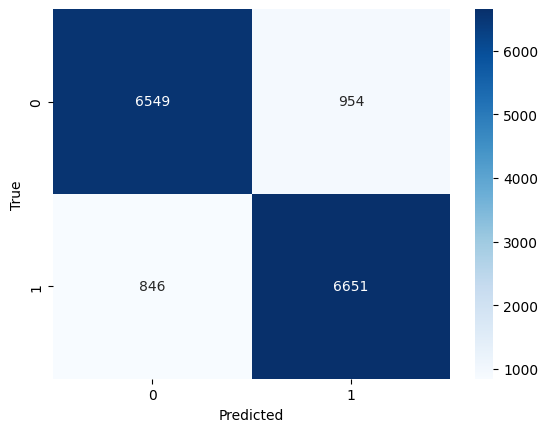

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(Y_test, Y_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Interprétation : 
- 6549 True negative
- 954 False positive 
- 846 False negative
- 6651 True positive


Pour améliorer un modèle de régression logistique, on peut notamment s'intéresser au seuil de probabilité utilisé pour décider de la classification. En ajustant ce seuil on peut notamment minimiser les faux positifs ou les faux négatifs. C'est notamment le cas lorsqu'on considère que se tromper dans un sens est plus coûteux que dans l'autre. Ici c'est le cas : nous voulons acheter que lorsque nous sommes sûrs que les articles récupérés sont positifs. Nous remarquons par ailleurs que le nombre de FP est supérieur au nombre de FN. Essayons de réduire les FP et voyons comment évolue la performance du modèle.

In [134]:
# On fixe par exemple le nouveau seuil à 0.6, ainsi pour que la prédiction soit considérée comme positive la probabilité devra être plus élevée qu'avant (0.6 > 0.5). 
# Il sera ainsi plus difficile d'être classé positif, ce qui devrait réduire la quantité de FP (le modèle doit être plus confiant qu'avant pour pouvoir annoncer qu'une review est positive)


from sklearn.metrics import precision_recall_curve
import numpy as np

Y_probas= logistic_regression.predict_proba(X_test)[:, 1] #probas estimées par le modèle que chaque prédiction appartiene à la classe (des reviews) positive(s)
#On modifie désormais les prédictions précédentes pour obtenir la nouvelle classification
threshold=0.6
Y_predicted_bis=np.where(Y_probas>=threshold,"positive", "negative")
Y_predicted_bis
print(classification_report(Y_test, Y_predicted_bis))

              precision    recall  f1-score   support

    negative       0.85      0.91      0.88      7503
    positive       0.91      0.83      0.87      7497

    accuracy                           0.87     15000
   macro avg       0.88      0.87      0.87     15000
weighted avg       0.88      0.87      0.87     15000



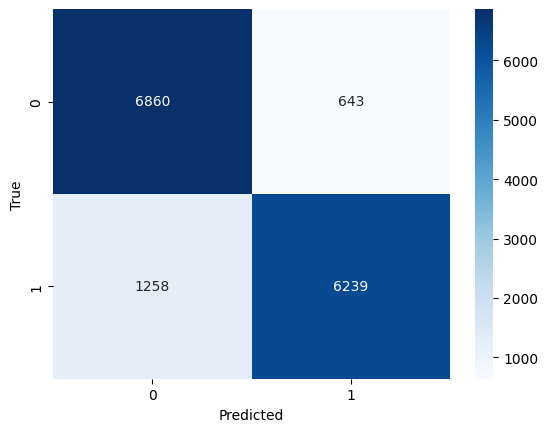

In [135]:
conf_mat = confusion_matrix(Y_test, Y_predicted_bis)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

On a bien fait diminuer le nombre de FP de 954 à 643. Le recall et le F1 score moyens ont très légerement diminué pour passer de 0.88 à 0.87 sur l'ensemble du dataset. À première vue, une telle évolution reste plutôt positive pour nous : nous prendrons moins de risque lorsque nous inciterons les utilisateurs à acheter.

On peut aussi s'intéresser à un autre paramètre pour améliorer la précision : le paramètre de régularisation. Ici, en particulier, on s'intéresse à l'inverse de ce paramètre. Il permet de pénaliser les poids du modèle afin de réduire les risques d'overfitting.

Afin de déterminer la valeur optimale de C, on peut utiliser la validation croisée. L'idée avec la validation croisée est de s'assurer que la valeur de C n'est pas optimal pour un unique sous-ensemble spécifique mais bien généralisable à de nouvelles instances. On considère les régressions Lasso (L1) et Ridge (L2)

In [139]:
from sklearn.model_selection import GridSearchCV

logistic_regression_2=LogisticRegression(max_iter=1000) #Si on ne spécifie pas un nombre maximal d'itération, on obtient "STOP: TOTAL NO. of ITERATIONS REACHED LIMIT."
grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]} 
grid_search=GridSearchCV(logistic_regression_2, grid)
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)

{'C': 1}


In [140]:
#On a obtenu C=1, on peut essayer d'affiner la valeur de C en changeant la grille 


logistic_regression_2=LogisticRegression(max_iter=1000) #Si on ne spécifie pas un nombre maximal d'itération, on obtient "STOP: TOTAL NO. of ITERATIONS REACHED LIMIT."
grid={'C': [0.5, 0.75, 1, 1.25, 1.5, 2]} 
grid_search=GridSearchCV(logistic_regression_2, grid)
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)

{'C': 2}


In [141]:
#On continue à affiner 
logistic_regression_2=LogisticRegression(max_iter=1000) #Si on ne spécifie pas un nombre maximal d'itération, on obtient "STOP: TOTAL NO. of ITERATIONS REACHED LIMIT."
grid={'C': [2, 3, 4, 5, 6]} 
grid_search=GridSearchCV(logistic_regression_2, grid)
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)

{'C': 2}


In [142]:
#On évalue désormais le modèle en prenant C=2 et le seuil de 0.6

logistic_regression_final=LogisticRegression(C=2) #On spécifie la valeur de C
logistic_regression_final.fit(X_train, Y_train)

Y_probas= logistic_regression_final.predict_proba(X_test)[:, 1] #probas estimées par le modèle que chaque prédiction appartiene à la classe (des reviews) positive(s)
threshold=0.6
Y_predicted_bis=np.where(Y_probas>=threshold,"positive", "negative")
Y_predicted_bis
print(classification_report(Y_test, Y_predicted_bis))

              precision    recall  f1-score   support

    negative       0.85      0.91      0.88      7503
    positive       0.90      0.84      0.87      7497

    accuracy                           0.87     15000
   macro avg       0.88      0.87      0.87     15000
weighted avg       0.88      0.87      0.87     15000



On a perdu 1 point de pourcentage de précision et gagné 1 point de pourcentage de recall pour la classe positive. Rien n'a changé pour la classe négative. On détecte donc désormais 1% des reviews positives en plus et parmi les reviews positives, on en a détecté 1% de moins que juste avant de fine tuner C. Prendre C=2 n'est donc pas pertinent ici puisque ce que nous cherchons surtout à augmenter est la précision sur la classe positive afin de ne pas inciter à acheter à tord.

Si on compare à la toute première régression réalisée, on remarque qu'on a gagné 4 points de pourcentage de précision pour la catégorie positive, ce qui est satisfaisant. Les valeurs de recall, précision et F1 Score moyennes sont par ailleurs les mêmes à un point de pourcentage près.
Nous gardons les résultats obtenus avant fine-tuning de la valeur de C pour les comparer aux prochaines approches.

# Random Forest

Les modèles de Random Forest sont plus robustes que les modèles de régression logistique. Ils permettent de capturer des relations non linéaires ce qui peut s'avérer fort utile pour de l'analyse de texte. Par ailleurs, ce sont des modèles qui nécessitent peu de fine tuning.

In [143]:
from sklearn.ensemble import RandomForestClassifier
random_forest= RandomForestClassifier(n_estimators=100) #On renseigne le nombre d'arbres. En ajoutant des arbres, on réduit le risque d'overfitting. On prend généralement entre 100 et 200 pour commencer.

random_forest.fit(X_train, Y_train)
Y_predicted_r_f=random_forest.predict(X_test)

print(classification_report(Y_test, Y_predicted_r_f))

              precision    recall  f1-score   support

    negative       0.84      0.86      0.85      7503
    positive       0.85      0.84      0.85      7497

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



On remarque des résultats à première vue moins satisfaisants.

In [144]:
print(confusion_matrix(Y_test, Y_predicted_r_f))

[[6424 1079]
 [1207 6290]]


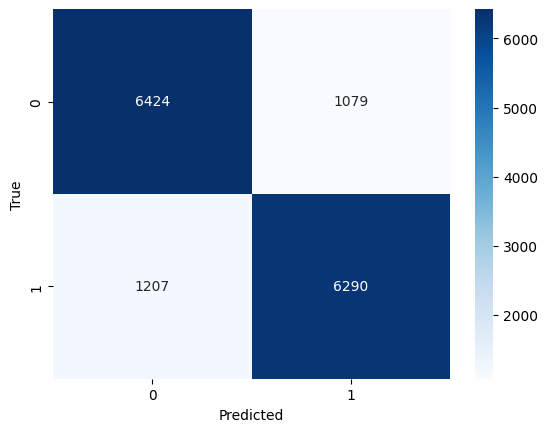

In [145]:
conf_mat = confusion_matrix(Y_test, Y_predicted_r_f)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [146]:
random_forest= RandomForestClassifier(n_estimators=50) #On renseigne le nombre d'arbres. En ajoutant des arbres, on réduit le risque d'overfitting. On prend généralement entre 100 et 200 pour commencer.

random_forest.fit(X_train, Y_train)
Y_predicted_r_f=random_forest.predict(X_test)

print(classification_report(Y_test, Y_predicted_r_f))

              precision    recall  f1-score   support

    negative       0.82      0.85      0.84      7503
    positive       0.85      0.82      0.83      7497

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



In [147]:
random_forest= RandomForestClassifier(n_estimators=200) 

random_forest.fit(X_train, Y_train)
Y_predicted_r_f=random_forest.predict(X_test)

print(classification_report(Y_test, Y_predicted_r_f))

              precision    recall  f1-score   support

    negative       0.84      0.85      0.85      7503
    positive       0.85      0.84      0.85      7497

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



Les hyperparamètres les plus importants dans le fine tuning sont 
- "n_estimators" :le nombre d'arbres dans la forêt
- "max_features" : le nombre de features prises en compte à chaque scission
- "max_depth" : la profondeur maximale de l'arbre
- "min_samples_split" : nombre minimum d'échantillon pour scinder un noeud

Essayons donc de fine-tuner ces paramètres afin de gagner en précision. GridSearchCV peut prendre du temps à tourner. Essayons de visualiser l'évolution des performances du modèle lorsqu'un seul paramètre varie.

In [161]:
#Visualisons les performances du modèle lorsque nous faisons varier "n_estimators"

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time

n_trees_grid=[10, 50, 100, 200, 400]

# On va récupérer les valeurs de précision du modèle ainsi que les temps d'exécution lorsque n_estimators prend les valeurs présentes dans cette grille

training_precisions = []
test_precisions = []
training_times = []

for n in n_trees_grid:
    rf=RandomForestClassifier(n_estimators=n)

    start_time=time.time()
    rf.fit(X_train, Y_train)
    end_time=time.time()

    duration = end_time-start_time

    training_predictions=rf.predict(X_train)
    test_predictions=rf.predict(X_test)

    #Comparaison des prédictions aux vraies valeurs
    training_precision=accuracy_score(Y_train, training_predictions)
    test_precision=accuracy_score(Y_test, test_predictions)

    #On ajoute ces résultats aux listes initiales
    training_precisions.append(training_precision)
    test_precisions.append(test_precision)
    training_times.append(duration)



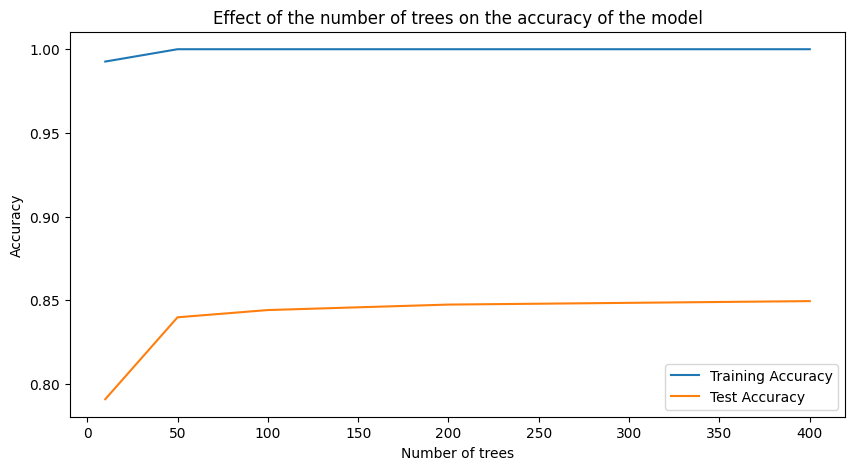

In [167]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(n_trees_grid, training_precisions, label='Training Accuracy')
plt.plot(n_trees_grid, test_precisions, label='Test Accuracy')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Effect of the number of trees on the accuracy of the model')
plt.legend()
plt.show()

In [168]:
training_precisions

[0.9926285714285714, 1.0, 1.0, 1.0, 1.0]

Text(0.5, 1.0, 'Training time VS number of trees')

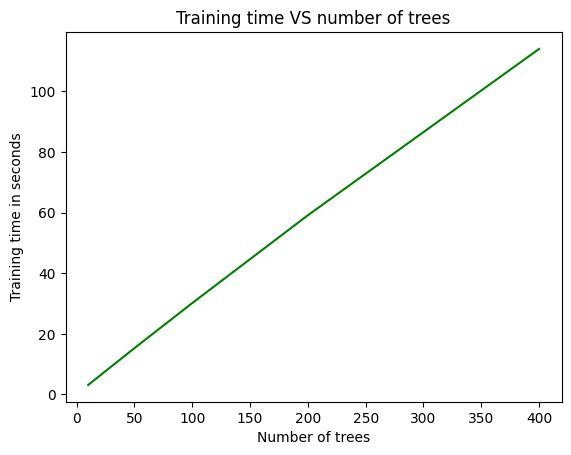

In [165]:
#On s'intéresse l'impact de l'augmentation du nombre d'arbres sur le temps d'entraînement du modèle

plt.plot(n_trees_grid, training_times, color='green')
plt.xlabel('Number of trees')
plt.ylabel('Training time in seconds')
plt.title('Training time VS number of trees')


Le premier graphique est une indication d'overfitting du modèle qui sur-performe sur l'ensemble d'entraînement atteignant une précision de 100%. Pour remédier à cela, on peut essayer de réduire la complexité du modèle.

Par défaut, 
- max_depth = None : les noeuds sont développés jusqu'à ce que toutes les feuilles soient pures ou contiennent moins que min_samples_split échantillons. On peut le fixer à des valeurs comme 10 ou 20
- min_samples_split = 2 : on peut passer cette valeur à 5 ou 1O.



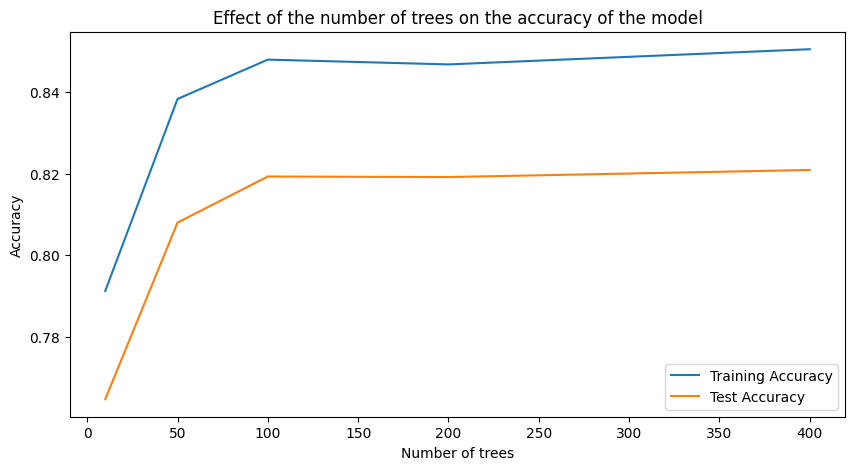

In [169]:
training_precisions_bis = []
test_precisions_bis = []
training_times_bis = []

for n in n_trees_grid:
    rf=RandomForestClassifier(n_estimators=n, max_depth=10, min_samples_split=5 )

    start_time=time.time()
    rf.fit(X_train, Y_train)
    end_time=time.time()

    duration = end_time-start_time

    training_predictions=rf.predict(X_train)
    test_predictions=rf.predict(X_test)

    #Comparaison des prédictions aux vraies valeurs
    training_precision=accuracy_score(Y_train, training_predictions)
    test_precision=accuracy_score(Y_test, test_predictions)

    #On ajoute ces résultats aux listes initiales
    training_precisions_bis.append(training_precision)
    test_precisions_bis.append(test_precision)
    training_times_bis.append(duration)

plt.figure(figsize=(10, 5))

plt.plot(n_trees_grid, training_precisions_bis, label='Training Accuracy')
plt.plot(n_trees_grid, test_precisions_bis, label='Test Accuracy')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Effect of the number of trees on the accuracy of the model')
plt.legend()
plt.show()

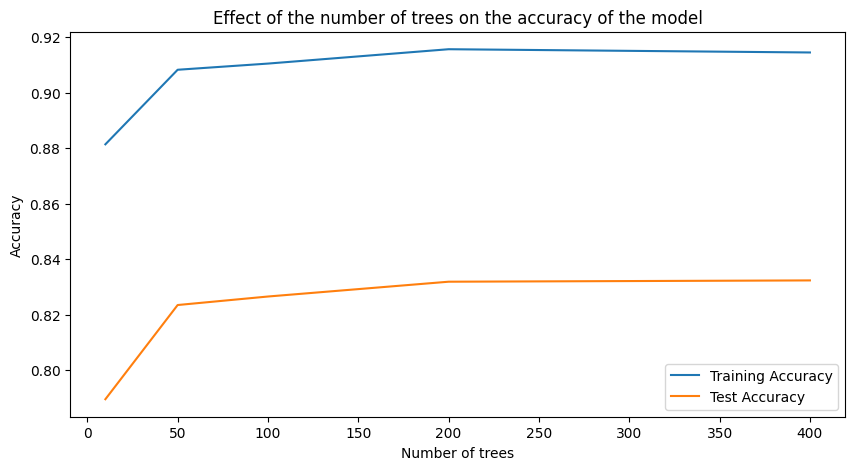

In [170]:
training_precisions_bis = []
test_precisions_bis = []
training_times_bis = []

for n in n_trees_grid:
    rf=RandomForestClassifier(n_estimators=n, max_depth=20, min_samples_split=5 )

    start_time=time.time()
    rf.fit(X_train, Y_train)
    end_time=time.time()

    duration = end_time-start_time

    training_predictions=rf.predict(X_train)
    test_predictions=rf.predict(X_test)

    #Comparaison des prédictions aux vraies valeurs
    training_precision=accuracy_score(Y_train, training_predictions)
    test_precision=accuracy_score(Y_test, test_predictions)

    #On ajoute ces résultats aux listes initiales
    training_precisions_bis.append(training_precision)
    test_precisions_bis.append(test_precision)
    training_times_bis.append(duration)

plt.figure(figsize=(10, 5))

plt.plot(n_trees_grid, training_precisions_bis, label='Training Accuracy')
plt.plot(n_trees_grid, test_precisions_bis, label='Test Accuracy')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Effect of the number of trees on the accuracy of the model')
plt.legend()
plt.show()

Ces résultats sont cohérents, nous avons rendu le modèle moins complexe donc il colle moins au données de l'ensemble d'entraînement. Par la même occasion, il perd légèrement en précision sur la base de test.

Afin d'améliorer la précision du modèle, on aurait pu augmenter la taille des données puisqu'un jeu de données plus grand bénéficie souvent à des modèles de Random Forest. Par choix, comme le modèle de régression logistique fournit des résultats plu satisfisants et que nous allons tester des réseaux de neurones complexes (LSTMs) dans la suite, nous en restons là pour le modèle de Random Forest.

# Long Short-Term Memory

Les LSTMs requièrent une phase de pré-traitement du texte bien plus importante. Conçus pour travailler avec des séquences de données, ils sont une évolution des Réseaux de Neurones Récurrents (RNN) et permettent notamment d'éviter les problèmes de vanishing gradient. Ils prennent en compte les dépendances séquentielles dans les données, ce qui les rend particulièrement performants pour prédire des séquences de mots ou assimiler des dépendances complexes dans les inputs comme nous pourrons l'exploiter aussi dans la partie de prévision du cours de l'action d'Apple. Ces caractéristiques nécessitent :

- la numérisation du texte (tokenisation)
- la normalisation des séquences de données de sorte à leur donner une longueur fixe (padding)
- l'odre séquentiel des features

## Tokenisation 

In [171]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 208.8 MB 4.5 MB/s eta 0:00:01     |█████████████████████████▏      | 164.4 MB 3.2 MB/s eta 0:00:14
     |████████████████████████████████| 20.6 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 3.5 MB/s eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 5.5 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 441 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.7 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 130 kB 2.9 MB/s eta 0:00:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 1.2 MB 5.0 MB/s eta 0:00:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 1.9 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 2.8 MB/s ta 0:

In [175]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#On définit le nombre maximal de mot pris en compte ci-dessous. De manière générale, 10000 mots est largement suffisant pour récupérer les mots les plus fréquents d'un langage.
#Les autres mots, moins importants (s'il y en a), ne seront pas pris en compte.

n_words=10000
tokenizer=Tokenizer(num_words=n_words)

#On construit désormais le dictionnaire interne à notre travail en se basant sur les 10000 mots considérés.
#La méthode fit_on_texts permet ici de donner un indice numérique unique à chacun d'entre eux

tokenizer.fit_on_texts(df_imdb['review'])

Pour plus de clarté, on peut visualiser le contenu de notre "dictionnaire"

In [197]:
#Accédons à chaque mot unique 
word_index = tokenizer.word_index
df=pd.DataFrame({'Mot':word_index.keys()}, index=word_index.values())
df[:10]
    

,Mot
1,the
2,and
3,a
4,of
5,to
6,is
7,in
8,it
9,i
10,this


À chaque token du texte est associé un indice. Affichons les 15 mots les plus fréquents de notre corpus.

Text(0.5, 1.0, '15 most frequent words')

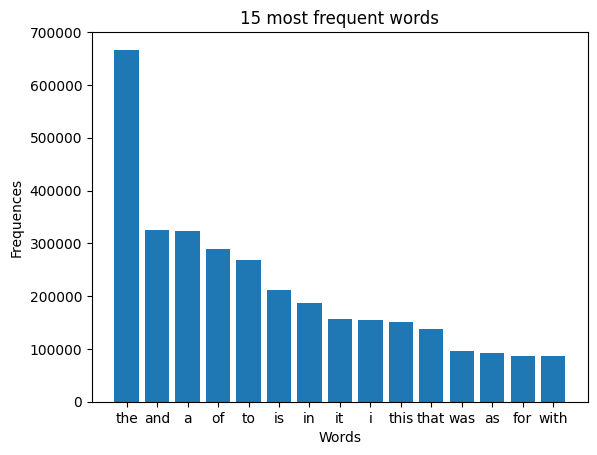

In [209]:
word_counts=tokenizer.word_counts
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:15]

list_of_words=[]
list_of_frequences=[]
for word, frequence in sorted_word_counts:
    for i in range(10):
        list_of_words.append(word)
        list_of_frequences.append(frequence)

fig, ax = plt.subplots()
ax.bar(list_of_words, list_of_frequences)

ax.set_ylabel('Frequences')
ax.set_xlabel('Words')
ax.set_title('15 most frequent words')

    

Ce n'est pas une surprise, on retrouve des stopwords.

In [200]:
print(f'Il y a {len(df)} tokens uniques dans notre vocabulaire.')

Il y a 124252 tokens uniques dans notre vocabulaire.


On remarque ici qu'il y a plus de tokens que la limite que nous avions spécifié pour n_words. À l'étape suivante, en appliquant la méthode texts_to_sequences, seuls les mots dont l'indice est inférieur à n_words seront gardés.

In [213]:
sequences = tokenizer.texts_to_sequences(df_imdb['review'])
#sequences est une liste de liste : chaque review de IMDB est transformé en liste, à chaque mot on associe l'indice correspondant dans word_index
print(df_imdb.iloc[0,0])
print(sequences[0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. I would say the main appeal of the show is due to the fact that it goes where other shows 

## Padding 

Comme expliqué précédemment, nous devons fixer une longueur type pour chaque séquence créée afin qu'elles soient toutes de même taille.

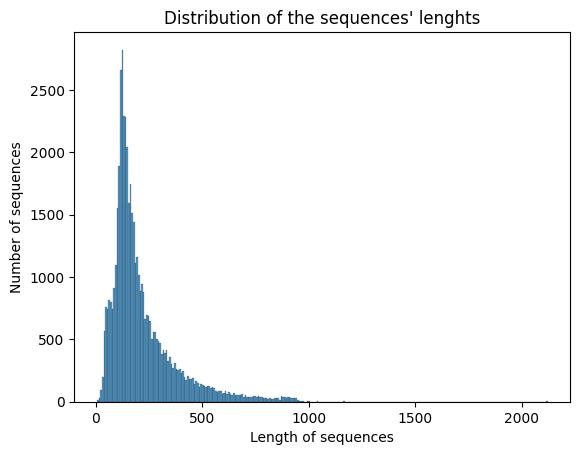

In [219]:
#On prend par exemple la longueur de la séquence la plus longue dans la liste de listes "sequences"
max_len=max(len(sequence) for sequence in sequences)

sequence_lengths = [len(seq) for seq in sequences]
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(sequence_lengths)
plt.xlabel('Length of sequences')
plt.ylabel('Number of sequences')
plt.title("Distribution of the sequences' lenghts")
plt.show()

In [ ]:
#Les séquences de taille plus courte que max_len seront artificiellement rallongées en ajoutant des 0
padded_sequences = pad_sequences(sequences, maxlen=max_len)

In [217]:
print(padded_sequences[0])

[   0    0    0 ...  124 4102  485]


## Construction du modèle LSTM


In [220]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

#On choisit des paramètres initiaux et assez courants. On pourra procéder à une phase de fine-tuning ensuite.

dim_embedding=128
lstm_units=50

#Création du modèle

model = Sequential()
model.add(Embedding(input_dim=n_words, output_dim=dim_embedding, input_length=max_len)) #Transformation des indices en vecteurs
model.add(LSTM(lstm_units)) #Couche LSTM
model.add(Dense(1, activation='sigmoid')) #La fonction d'activation sigmoid est classique pour les problèmes de classification

#On compile le modèle 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [221]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2123, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 50)                35800     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 1315851 (5.02 MB)
Trainable params: 1315851 (5.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Interprétation : 
- le modèle est assez grand puisqu'il possède 1,3 millions de paramètres.
- on a bien 50 unités de LSTMs, ce nombre peut-être amené à changer dans la phase de fine tuning.

## Entraînement du modèle 

In [225]:
# On convertit la colonne "sentiment" de df_imdb en binaire

df_imdb['labels']=df_imdb['sentiment'].apply(lambda x : 1 if x=='positive' else 0)

In [226]:
# On crée les ensembles d'entrainement, de validation et de test

from sklearn.model_selection import train_test_split
#Création des ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(padded_sequences, df_imdb['labels'], test_size=0.2, random_state=42)

#Division de l'ensemble d'entraînement en ensembles de validation et d'entraînement
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42) 
#0.25 x 0.8 = 0.2 (25% de l'ensemble d'entraînement, soit 20% du total, est alloué à la validation)

history = model.fit(X_train, Y_train, 
                    batch_size=32, 
                    epochs=10, 
                    validation_data=(X_val, Y_val))
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test Accuracy:', test_acc)


Epoch 1/10
938/938 [==============================] - 709s 755ms/step - loss: 0.4088 - accuracy: 0.8174 - val_loss: 0.4109 - val_accuracy: 0.8043
Epoch 2/10
938/938 [==============================] - 925s 987ms/step - loss: 0.2580 - accuracy: 0.8976 - val_loss: 0.2733 - val_accuracy: 0.8930
Epoch 3/10
938/938 [==============================] - 1096s 1s/step - loss: 0.1900 - accuracy: 0.9286 - val_loss: 0.2905 - val_accuracy: 0.8820
Epoch 4/10
938/938 [==============================] - 1088s 1s/step - loss: 0.1508 - accuracy: 0.9451 - val_loss: 0.3218 - val_accuracy: 0.8899
Epoch 5/10
938/938 [==============================] - 892s 951ms/step - loss: 0.1093 - accuracy: 0.9621 - val_loss: 0.3892 - val_accuracy: 0.8821
Epoch 6/10
938/938 [==============================] - 722s 770ms/step - loss: 0.0823 - accuracy: 0.9720 - val_loss: 0.4211 - val_accuracy: 0.8825
Epoch 7/10
938/938 [==============================] - 705s 752ms/step - loss: 0.0780 - accuracy: 0.9737 - val_loss: 0.4496 - val

On distingue déjà des élements qui nous font penser à de l'overfitting. Traçons l'évolution des performances du modèle au cours de ces 10 epochs.

<Figure size 640x480 with 0 Axes>

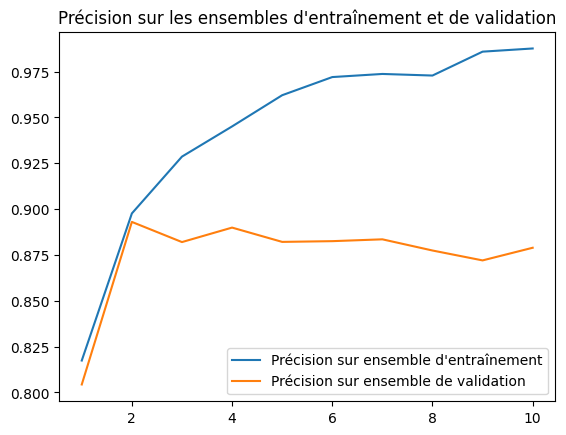

<Figure size 640x480 with 0 Axes>

In [232]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

steps=[i for i in range(1,11)]

plt.plot(steps, accuracy, label="Précision sur l'ensemble d'entraînement")
plt.plot(steps, val_accuracy, label="Précision sur l'ensemble de validation")
plt.title("Précision sur les ensembles d'entraînement et de validation")
plt.legend()

plt.figure()


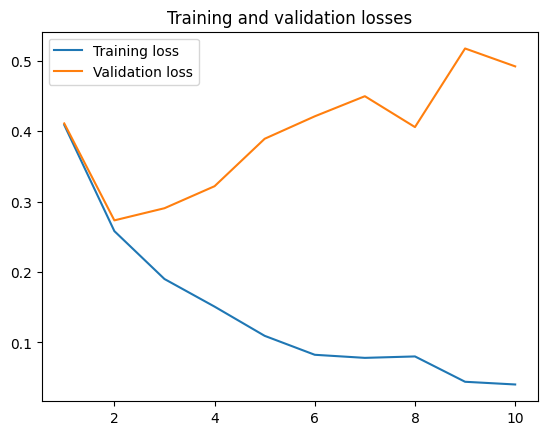

In [233]:
plt.plot(steps, loss, label='Training loss')
plt.plot(steps, val_loss, label='Validation loss')
plt.title('Training and validation losses')
plt.legend()
plt.show()

Avec quelques recherches, on apprend que les meilleures performances réalisées à ce jour sur l'ensemble IMDB est une accuracy de 96,2%. Par ailleurs, et plus simplement, on observe qu'au  bout de 2 epochs, les performances sur l'ensemble d'entraînement se stabilisent et n'augmentent plus. De même au bout de 2 epochs, on constate que les pertes réalisées sur l'ensemble de validation croissent alors que sur l'ensemble d'entraînement on arrive au bout de 10 epochs à une précision aberrante de 0.9876 et une perte de 0.0402 ce qui est bien trop optimiste pour notre modèle.

On est donc ici face à un cas d'**overfitting**.

Au bout de 2 epochs cependant, on obtient une validation accuracy de presque 90%, ce qui est mieux qu'avec notre régression logistique initiale. Cela est rassurant et nous laisse penser qu'en fine tunant un peu le modèle et en limitant l'overfitting, on pourra obtenir des résultats encore plus satisfaisants.

## Lutter contre l'overfitting
### Technique de dropout 

**Modèle v2**

In [235]:
from tensorflow.keras.layers import Dropout, SpatialDropout1D

model = Sequential()
model.add(Embedding(input_dim=n_words, output_dim=dim_embedding, input_length=max_len)) #Transformation des indices en vecteurs
model.add(SpatialDropout1D(0.2))
model.add(LSTM(lstm_units)) #Couche LSTM
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) #La fonction d'activation sigmoid est classique pour les problèmes de classification

#On compile le modèle 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [236]:
history_V2 = model.fit(X_train, Y_train, 
                    batch_size=32, 
                    epochs=10, 
                    validation_data=(X_val, Y_val))
test_loss_V2, test_acc_V2 = model.evaluate(X_test, Y_test)
print('Test Accuracy:', test_acc)

Epoch 1/10
938/938 [==============================] - 916s 975ms/step - loss: 0.4149 - accuracy: 0.8147 - val_loss: 0.3484 - val_accuracy: 0.8670
Epoch 2/10
938/938 [==============================] - 701s 748ms/step - loss: 0.2685 - accuracy: 0.8970 - val_loss: 0.2937 - val_accuracy: 0.8821
Epoch 3/10
938/938 [==============================] - 702s 748ms/step - loss: 0.2050 - accuracy: 0.9237 - val_loss: 0.3677 - val_accuracy: 0.8419
Epoch 4/10
938/938 [==============================] - 705s 752ms/step - loss: 0.1640 - accuracy: 0.9412 - val_loss: 0.3226 - val_accuracy: 0.8918
Epoch 5/10
938/938 [==============================] - 722s 770ms/step - loss: 0.1393 - accuracy: 0.9504 - val_loss: 0.3871 - val_accuracy: 0.8561
Epoch 6/10
224/938 [======>.......................] - ETA: 8:39 - loss: 0.1067 - accuracy: 0.9633

KeyboardInterrupt: 

Il ne semble pas y avoir de différence significative

### Technique de early stopping

### Fine tuning des paramètres